# Analyse World Youth Unemployment

We need to analyse the dataset https://data.worldbank.org/indicator/SL.UEM.1524.ZS 

In [2]:
import sys
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
path = sys.path[0]+'/Dataset/'
# read all CSV files in folder using glob 
csv_files = glob.glob(os.path.join(path, "*.csv"))

Read csv file, The first 4 rows is unneccessary, so skip the first 4 rows

In [3]:
# the file name start API...
dataframe = pd.read_csv(csv_files[0], skiprows=4)
dataframe

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120,NaN
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000,NaN
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.806268,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801,NaN
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.865000,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000,NaN
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,41.990000,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000,NaN
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.291000,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000,NaN


Check how many countries? 

In [4]:
countrries_number = dataframe['Country Name'].count()
countrries_number

266

Check columns name and how many years?

In [5]:
# Check columns name
column_names = dataframe.columns
column_names

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [6]:
# How many years?
years_number = len(column_names[4:-2])
years_number

63

Selecting the subset of data from the given dataset. 

Select only data from the last 5 years. 

In [7]:
data_from_last_5_years = dataframe.iloc[:, [0, 1, 2, 3, -6, -5, -4, -3, -2,]]
data_from_last_5_years

,Country Name,Country Code,Indicator Name,Indicator Code,2019,2020,2021,2022,2023
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,13.140962,13.785127,13.723889,12.865525,13.004120
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,15.921000,16.051000,16.385000,17.748000,18.076000
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.992928,9.417347,8.054141,6.446285,5.992801
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,31.632000,32.455000,29.997000,28.416000,28.235000
...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,32.332000,34.181000,33.779000,32.939000,32.655000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,47.411000,43.500000,49.866000,49.826000,49.144000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.330000,11.021000,9.342000,9.859000,9.764000


check missing value

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

dropping null values

In [9]:
# Drop any cloummns that all the indexes have null value
non_null_df = dataframe.dropna(axis=1, how='all')
non_null_df

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.566498,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,10.092000,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,...,8.289668,8.806268,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,...,35.478000,34.865000,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,24.486000,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,...,43.954000,41.990000,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.166000,17.291000,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000


In [10]:
# Check missing value again
non_null_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1991            235 non-null    float64
 5   1992            235 non-null    float64
 6   1993            235 non-null    float64
 7   1994            235 non-null    float64
 8   1995            235 non-null    float64
 9   1996            235 non-null    float64
 10  1997            235 non-null    float64
 11  1998            235 non-null    float64
 12  1999            235 non-null    float64
 13  2000            235 non-null    float64
 14  2001            235 non-null    float64
 15  2002            235 non-null    float64
 16  2003            235 non-null    float64
 17  2004            235 non-null    flo

The above code still have null value? we need to drop if any columns has null value

In [11]:
# Drop row that has null values
non_null_df = non_null_df.dropna(axis=0 )
non_null_df

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.566498,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,10.092000,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,...,8.289668,8.806268,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,...,35.478000,34.865000,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,...,39.759000,39.883000,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.312000,5.025000,5.604000,6.271000,6.889000,7.588000,...,17.221000,17.749000,18.317000,19.092000,19.331000,19.600000,21.197000,20.693000,20.046000,19.755000
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,24.486000,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,...,43.954000,41.990000,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.166000,17.291000,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000


check the type of data

In [12]:
type(non_null_df)

pandas.core.frame.DataFrame

sorting 

In [13]:
# sorting by country name
non_null_df.sort_values(by='Country Name')

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,10.092000,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.566498,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,...,8.289668,8.806268,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,...,39.759000,39.883000,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000
60,Algeria,DZA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,32.573000,38.644000,41.616000,44.204000,51.109000,45.950000,...,25.384000,30.238000,26.173000,30.249000,30.740000,31.155000,35.384000,33.700000,31.992000,30.778000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Virgin Islands (U.S.),VIR,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,26.188000,26.841000,26.775000,25.999000,25.472000,24.384000,...,27.486000,26.484000,27.744000,26.877000,26.892000,27.396000,34.825000,31.417000,26.953000,25.554000
259,World,WLD,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.129483,10.373138,10.961321,11.513666,11.990225,12.218247,...,15.140984,15.612717,15.822080,15.981629,15.929680,15.309330,17.088391,15.686746,14.317327,13.785815
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,24.486000,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.166000,17.291000,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000


In [14]:
# show data
non_null_df

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.566498,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,10.092000,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,...,8.289668,8.806268,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,...,35.478000,34.865000,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,...,39.759000,39.883000,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.312000,5.025000,5.604000,6.271000,6.889000,7.588000,...,17.221000,17.749000,18.317000,19.092000,19.331000,19.600000,21.197000,20.693000,20.046000,19.755000
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,24.486000,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,...,43.954000,41.990000,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.166000,17.291000,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000


Setting the index

set the `Country Code` column as an index 

In [15]:
non_null_df.set_index('Country Code')

,Country Name,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Code,,,,,,,,,,,,,,,,,,,,,
AFE,Africa Eastern and Southern,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,14.094300,...,13.566498,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120
AFG,Afghanistan,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,10.195000,...,10.092000,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000
AFW,Africa Western and Central,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,8.459517,...,8.289668,8.806268,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801
AGO,Angola,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,37.029000,...,35.478000,34.865000,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000
ALB,Albania,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,26.901000,...,39.759000,39.883000,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,Samoa,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.312000,5.025000,5.604000,6.271000,6.889000,7.588000,8.259000,...,17.221000,17.749000,18.317000,19.092000,19.331000,19.600000,21.197000,20.693000,20.046000,19.755000
YEM,"Yemen, Rep.","Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,17.812000,...,24.486000,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000
ZAF,South Africa,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,35.936000,...,43.954000,41.990000,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000


Check info of the descriptive statistic of the data in all 10 years

In [16]:
descriptive_statistics  = non_null_df[non_null_df.columns[-10:]].describe()
descriptive_statistics

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,17.651176,17.526781,17.324727,16.925399,16.425861,16.091222,18.506837,17.531029,16.033398,15.779056
std,12.390383,12.032507,11.657680,11.314800,11.200129,10.894979,11.983443,11.600288,11.069541,10.841875
min,0.674000,0.574000,0.484000,0.383000,0.309000,0.295000,0.494000,0.771000,0.613000,0.601000
25%,9.229000,9.215000,9.511000,8.922000,8.681000,8.668000,10.642058,10.002000,8.413000,8.804000
50%,14.930447,14.833188,14.932000,14.070713,13.029140,12.851000,15.823597,15.150000,13.507000,13.361976
75%,23.839000,22.862000,23.764055,22.685000,22.341000,21.011000,24.595000,22.449000,20.690000,20.361000
max,73.076000,73.319000,73.435000,74.054000,74.867000,75.533000,81.287000,78.955000,76.402000,76.470000


Convert pandas array to numpy array

In [17]:
np_descriptive_statistics_array = descriptive_statistics.to_numpy()
np_descriptive_statistics_array[1]

array([17.65117632, 17.52678146, 17.3247268 , 16.92539925, 16.42586117,
       16.09122206, 18.50683737, 17.5310294 , 16.03339805, 15.7790562 ])

Check the descriptive statistic of year 2012 

In [18]:
non_null_df['2012'].describe()

count    233.000000
mean      17.781285
std       12.358031
min        0.688000
25%        8.789000
50%       14.975066
75%       23.597000
max       72.097000
Name: 2012, dtype: float64

and plot box plot year 2012

```
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset

data = data1['2012'].to_numpy()
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()
```

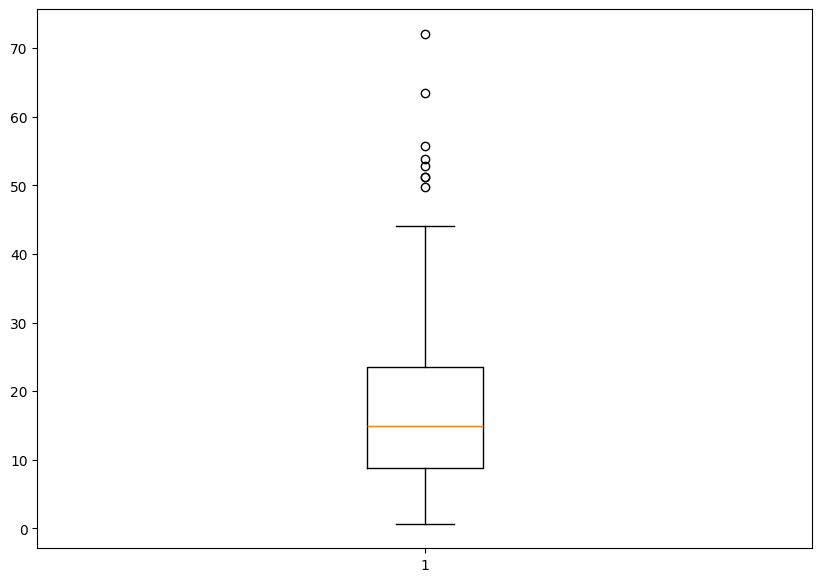

In [19]:

# Creating dataset

data = non_null_df['2012'].to_numpy()
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

Add new column as average of 10 years in each rows and set the name as `data["10years_avg"]`

In [43]:
last_10_years = non_null_df.loc[:, '2014':'2023']
non_null_df.loc[:, '10years_avg'] = last_10_years.mean(axis=1)

non_null_df

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg,covid_year_dif
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120,13.264644,0.644165
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000,15.565000,0.130000
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,...,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801,8.260379,0.424419
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,...,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000,32.141500,0.823000
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,...,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000,31.906600,3.488000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.312000,5.025000,5.604000,6.271000,6.889000,7.588000,...,18.317000,19.092000,19.331000,19.600000,21.197000,20.693000,20.046000,19.755000,19.300100,1.597000
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000,32.217200,1.849000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,...,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000,45.619500,-3.911000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000,12.776100,0.691000


Plotting the 10years_avg unemployment data using bar graph where x axis is countries and y axis is 10 years avg of unemployment rate

```
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(120,40))

plt.bar(countries, avg10y, color ='maroon')

# ax.bar(countries, avg10y, align = 'edge')

# plt.xlabel('countries',fontsize = 60)
# plt.ylabel('10 years avg unemployment rate',fontsize = 60)
plt.xlabel('countries')
plt.ylabel('10 years avg unemployment rate')
plt.xticks(rotation = 70, fontsize = 20)
plt.yticks(rotation = 'vertical', fontsize = 20)
plt.title("Unemployment average of the last 10 year (2012-2022)")

plt.show()

```

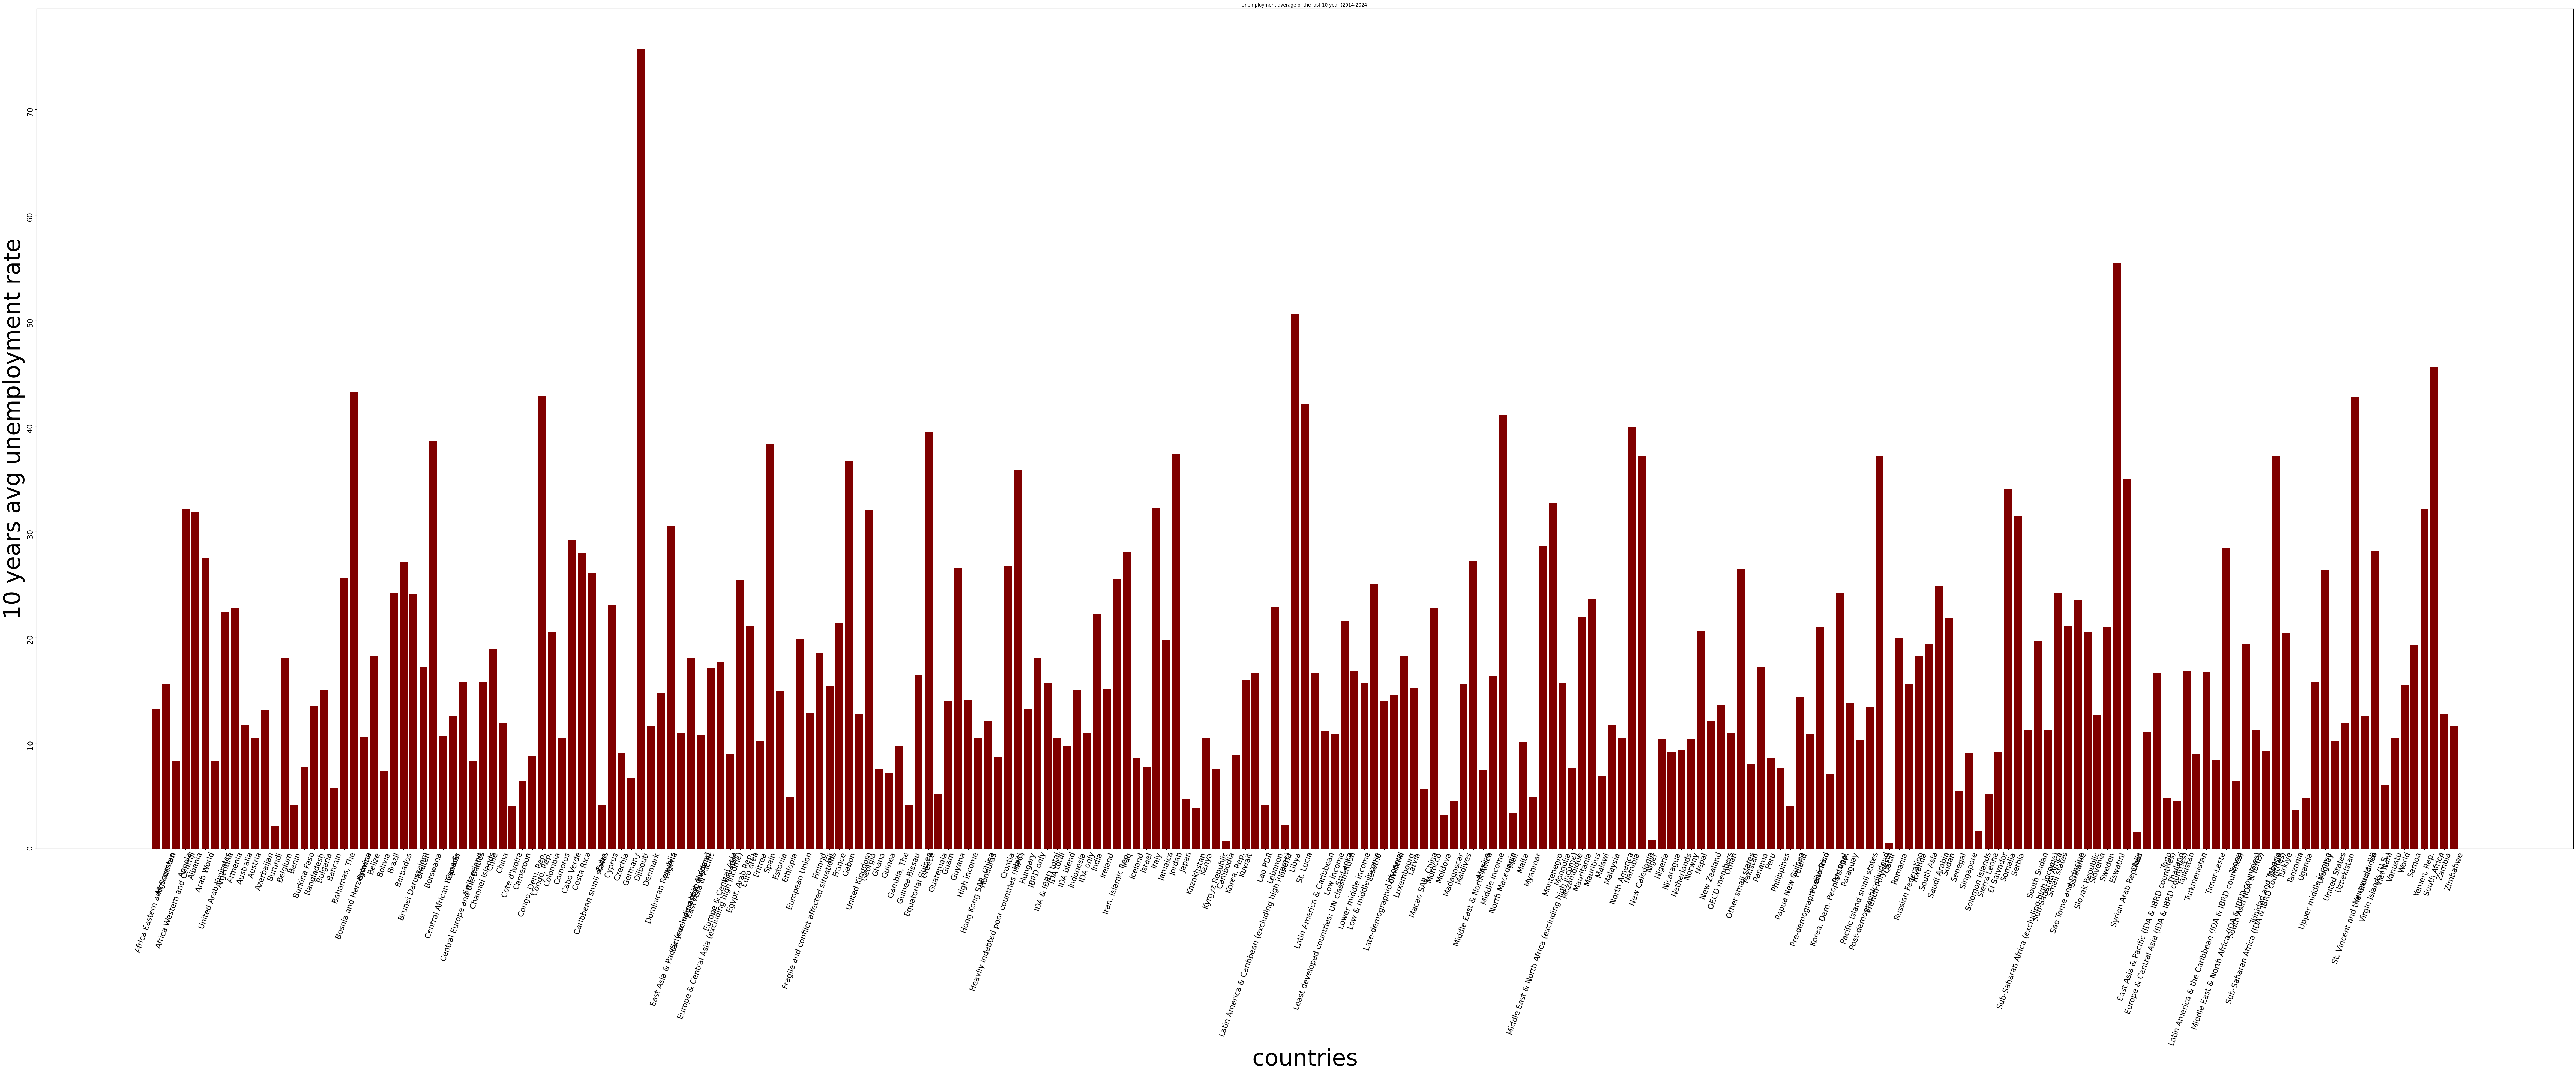

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(120,40))
countries = non_null_df['Country Name']
avg10y = non_null_df['10years_avg']
plt.bar(countries, avg10y, color ='maroon')

# ax.bar(countries, avg10y, align = 'edge')

plt.xlabel('countries',fontsize = 60)
plt.ylabel('10 years avg unemployment rate',fontsize = 60)
# plt.xlabel('countries')
# plt.ylabel('10 years avg unemployment rate')
plt.xticks(rotation = 70, fontsize = 20)
plt.yticks(rotation = 'vertical', fontsize = 20)
plt.title("Unemployment average of the last 10 year (2014-2024)")

plt.show()

#### Perform the data analysis and plotting summary of them

- list all countries where unemployment is greater than or equal to 25% in 2022

In [22]:
first_quantile_of_2022 = non_null_df['2022'].quantile(.25)
non_null_df[non_null_df['2022'] >= first_quantile_of_2022]

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.245428,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120,13.264644
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,12.518000,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000,15.565000
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,...,34.865000,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000,32.141500
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,...,39.883000,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000,31.906600
7,Arab World,ARB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,24.883162,25.158524,26.936845,27.143669,27.778764,25.646363,...,28.950714,28.456240,29.300654,27.840080,26.405140,28.340254,27.135590,25.385708,25.640803,27.488278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.312000,5.025000,5.604000,6.271000,6.889000,7.588000,...,17.749000,18.317000,19.092000,19.331000,19.600000,21.197000,20.693000,20.046000,19.755000,19.300100
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,32.404000,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000,32.217200
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,...,41.990000,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000,45.619500
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.291000,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000,12.776100


- list all countries where unemployment is less than or equal to 1% in 2022

In [23]:
min_quantile_of_2022 = non_null_df['2022'].min()
non_null_df[non_null_df['2022'] <= min_quantile_of_2022 ]

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg
200,Qatar,QAT,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2.506,2.524,2.554,2.601,2.66,2.728,...,0.574,0.484,0.505,0.309,0.295,0.494,0.771,0.613,0.601,0.5386


- list top 10 countries that have an average high rate of unemployment from 2012-2022

In [24]:
top_high_unemployment_rate = non_null_df.sort_values(by='10years_avg', ascending=False)
top_10_high_unemployment_rate = top_high_unemployment_rate.head(10)
top_10_high_unemployment_rate


,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg
56,Djibouti,DJI,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,57.139,57.130,58.809,59.200,59.978,60.281,...,73.319,73.435,74.054,74.867,75.533,81.287,78.955,76.402,76.470,75.7398
224,Eswatini,SWZ,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,41.363,42.319,43.926,44.119,44.239,44.927,...,47.923,46.950,49.464,51.969,54.284,62.768,61.820,65.343,64.989,55.4462
132,Libya,LBY,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,43.485,44.180,44.760,45.540,45.885,45.791,...,51.181,50.963,50.088,49.772,50.176,52.601,51.346,50.599,49.440,50.6620
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841,35.717,35.993,35.984,35.815,35.731,...,41.990,43.933,42.811,43.760,47.411,43.500,49.866,49.826,49.144,45.6195
24,Bosnia and Herzegovina,BIH,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.612,36.699,38.851,40.610,42.092,43.312,...,63.152,55.095,46.507,39.454,34.100,37.052,35.327,31.891,26.520,43.2465
44,"Congo, Rep.",COG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.374,38.509,38.758,39.335,39.428,39.296,...,41.647,42.294,42.989,43.126,42.579,46.736,45.055,41.720,41.200,42.8166
253,St. Vincent and the Grenadines,VCT,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,36.119,36.036,36.528,37.140,37.494,38.233,...,41.234,41.303,41.564,41.853,42.617,46.509,45.063,43.696,42.312,42.7327
133,St. Lucia,LCA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,26.345,26.528,26.980,27.419,25.575,26.355,...,47.078,45.982,45.143,41.794,36.024,52.274,45.283,30.974,28.152,42.0634
157,North Macedonia,MKD,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,44.512,47.777,50.164,54.219,64.202,69.897,...,47.636,48.674,46.942,45.651,35.361,35.579,36.083,32.457,28.566,41.0237
171,Namibia,NAM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.477,34.348,34.848,35.570,39.554,42.958,...,41.154,44.151,41.433,37.981,38.251,41.259,40.098,38.578,38.032,39.9575


- plot top 10 countries that have an average high rate of unemployment from 2012-2022 using bar graph

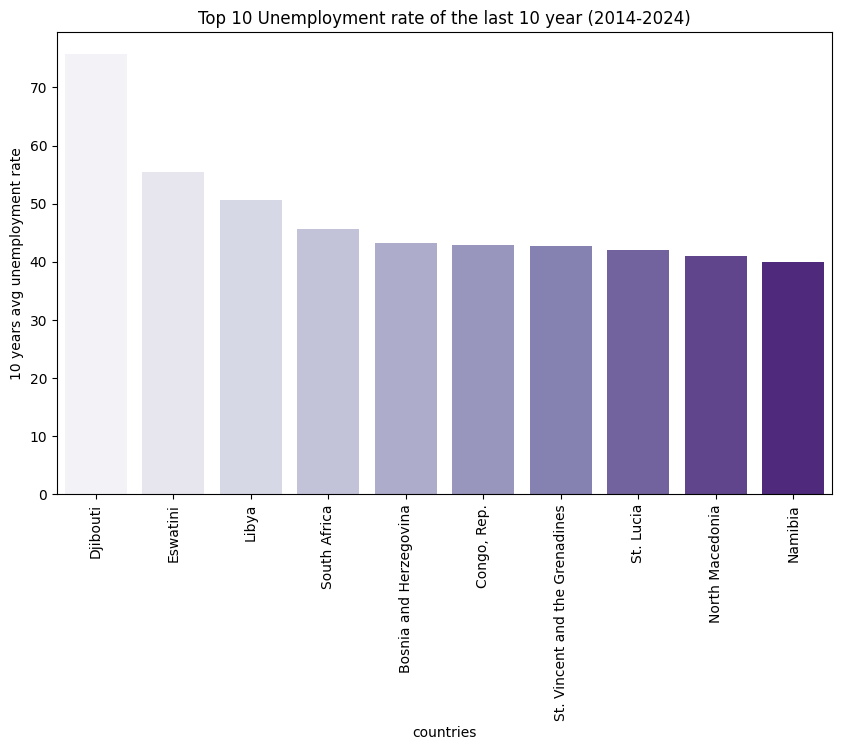

In [25]:
countries = top_10_high_unemployment_rate['Country Name']
avg10y = top_10_high_unemployment_rate['10years_avg']
paired_palette = sns.color_palette('Purples',10)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('countries')
plt.ylabel('10 years avg unemployment rate')
plt.title("Top 10 Unemployment rate of the last 10 year (2014-2024)")
barplot = sns.barplot(x=countries, y=avg10y, palette=paired_palette, legend=False, hue=countries)
plt.show()

- list top 10 countries that have an average low
 rate of unemployment from 2012-2022

In [26]:
top_high_unemployment_rate = non_null_df.sort_values(by='10years_avg', ascending=False)
top_10_low_unemployment_rate = top_high_unemployment_rate.tail(10)
top_10_low_unemployment_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg
246,Tanzania,TZA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,6.360,6.438,6.664,6.576,6.308,6.047,...,3.676,3.633,3.586,3.557,3.532,3.815,3.749,3.494,3.490,3.6292
158,Mali,MLI,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2.116,2.190,2.126,2.208,2.161,2.115,...,2.169,2.135,2.231,2.335,4.182,6.728,3.672,4.177,4.106,3.3980
150,Moldova,MDA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,3.602,6.944,6.925,10.793,9.912,14.720,...,3.333,3.010,3.902,3.187,3.240,4.008,1.787,2.818,4.183,3.1767
131,Liberia,LBR,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,3.416,3.461,3.429,3.404,3.349,3.190,...,1.921,2.304,2.299,2.296,2.301,2.836,2.774,2.275,2.259,2.2819
16,Burundi,BDI,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,3.911,3.893,3.868,3.879,3.846,3.848,...,2.679,2.468,2.240,2.008,1.767,1.691,1.746,1.719,1.720,2.0967
209,Solomon Islands,SLB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,3.296,3.220,3.209,3.200,3.250,3.288,...,1.285,1.288,1.285,1.284,1.298,1.443,1.361,3.020,2.998,1.6543
229,Chad,TCD,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,0.960,0.953,0.973,0.991,1.022,1.012,...,1.400,1.449,1.490,1.513,1.496,1.831,1.965,1.497,1.488,1.5492
173,Niger,NER,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,3.224,3.207,3.178,3.133,3.127,3.127,...,0.723,0.754,0.791,0.812,0.842,0.944,1.084,0.846,0.844,0.8314
123,Cambodia,KHM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1.417,1.442,1.465,1.416,1.426,1.431,...,0.769,1.165,0.383,0.392,0.405,0.507,0.864,0.782,0.777,0.7118
200,Qatar,QAT,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,2.506,2.524,2.554,2.601,2.660,2.728,...,0.574,0.484,0.505,0.309,0.295,0.494,0.771,0.613,0.601,0.5386


- plot top 10 countries that have an average low rate of unemployment from 2012-2022 using bar graph


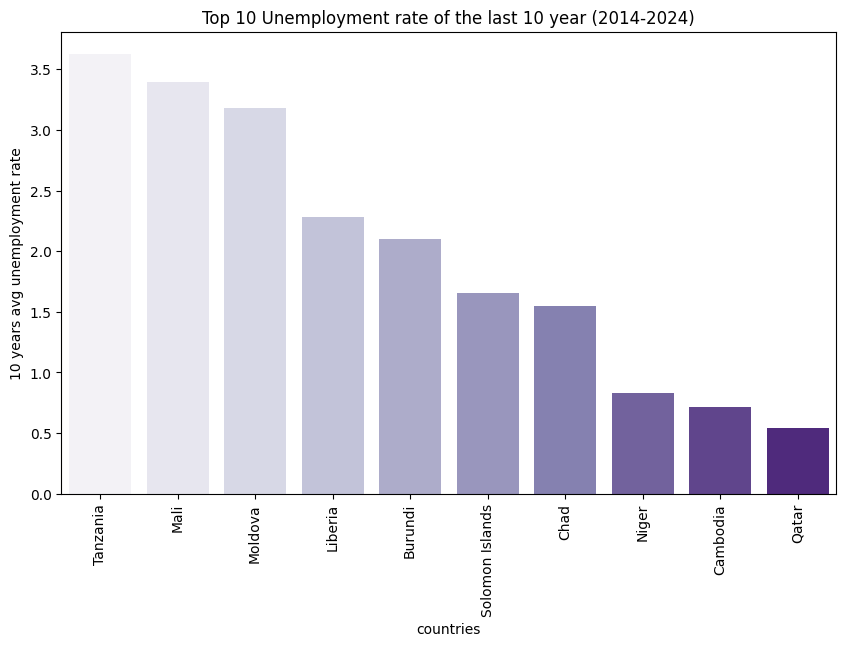

In [27]:
countries = top_10_low_unemployment_rate['Country Name']
avg10y = top_10_low_unemployment_rate['10years_avg']
paired_palette = sns.color_palette('Purples',10)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('countries')
plt.ylabel('10 years avg unemployment rate')
plt.title("Top 10 Unemployment rate of the last 10 year (2014-2024)")
barplot = sns.barplot(x=countries, y=avg10y, palette=paired_palette, legend=False, hue=countries)
plt.show()

#### Now we want to see the unemployment rate in Covid

So we add another column to see the different 2019 and 2020

- Add new column `data['covid_year_dif']`


`data1['covid_year_dif'] = data1['2020'] - data1['2019']`

In [44]:
covid_year_dif =  non_null_df['2020'] - non_null_df['2019']
non_null_df.loc[:, 'covid_year_dif'] = covid_year_dif
non_null_df

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg,covid_year_dif
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,14.449872,14.537936,14.532508,14.382675,14.144324,14.074791,...,13.267751,13.145393,12.901749,13.140962,13.785127,13.723889,12.865525,13.004120,13.264644,0.644165
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,10.205000,10.197000,10.215000,10.234000,10.227000,10.209000,...,14.920000,17.313000,16.626000,15.921000,16.051000,16.385000,17.748000,18.076000,15.565000,0.130000
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.205040,8.340080,8.521444,8.554603,8.570171,8.489809,...,8.734919,8.907975,8.961455,8.992928,9.417347,8.054141,6.446285,5.992801,8.260379,0.424419
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,38.253000,38.595000,39.555000,39.628000,38.806000,37.270000,...,34.229000,33.481000,32.627000,31.632000,32.455000,29.997000,28.416000,28.235000,32.141500,0.823000
5,Albania,ALB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.127000,47.049000,39.759000,32.977000,23.242000,22.209000,...,36.159000,31.397000,28.320000,27.142000,30.630000,29.430000,28.100000,28.246000,31.906600,3.488000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.312000,5.025000,5.604000,6.271000,6.889000,7.588000,...,18.317000,19.092000,19.331000,19.600000,21.197000,20.693000,20.046000,19.755000,19.300100,1.597000
262,"Yemen, Rep.",YEM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,16.735000,16.634000,16.930000,16.912000,17.257000,17.514000,...,33.189000,33.604000,32.603000,32.332000,34.181000,33.779000,32.939000,32.655000,32.217200,1.849000
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841000,35.717000,35.993000,35.984000,35.815000,35.731000,...,43.933000,42.811000,43.760000,47.411000,43.500000,49.866000,49.826000,49.144000,45.619500,-3.911000
264,Zambia,ZMB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.077000,35.029000,35.261000,33.249000,30.095000,27.356000,...,17.205000,17.052000,8.731000,10.330000,11.021000,9.342000,9.859000,9.764000,12.776100,0.691000



- list top 10 countries that have an high covid impact of unemployment

In [29]:
top_high_covid_impact_rate = non_null_df.sort_values(by='covid_year_dif', ascending=False)
top_10_high_covid_impact_rate = top_high_covid_impact_rate.head(10)
top_10_high_covid_impact_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg,covid_year_dif
133,St. Lucia,LCA,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,26.345,26.528,26.980,27.419,25.575,26.355,...,45.982,45.143,41.794,36.024,52.274,45.283,30.974,28.152,42.0634,16.250
185,Panama,PAN,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,13.317,13.105,13.198,13.470,13.653,13.760,...,12.299,14.827,14.090,17.136,31.874,22.449,19.190,16.589,17.1668,14.738
172,New Caledonia,NCL,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,42.293,43.652,44.229,44.842,44.726,45.078,...,37.163,36.452,39.999,32.431,46.146,38.646,32.758,32.572,37.2022,13.715
162,Montenegro,MNE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,54.326,54.677,55.163,55.237,55.087,54.705,...,36.106,31.888,29.667,25.355,36.339,37.724,28.035,27.930,32.6832,10.984
32,Bhutan,BTN,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.246,4.278,4.327,4.342,4.366,4.361,...,11.685,13.385,15.202,11.561,21.997,20.619,29.592,29.238,17.2416,10.436
35,Canada,CAN,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,15.845,17.227,17.201,15.906,14.843,15.414,...,12.628,11.268,10.744,10.774,20.157,13.571,10.112,10.591,12.5881,9.383
48,Costa Rica,CRI,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,11.147,7.672,8.304,8.280,11.711,12.259,...,21.698,20.790,25.138,31.276,40.173,39.256,30.748,24.099,27.9872,8.897
224,Eswatini,SWZ,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,41.363,42.319,43.926,44.119,44.239,44.927,...,46.950,49.464,51.969,54.284,62.768,61.820,65.343,64.989,55.4462,8.484
28,Bolivia,BOL,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,4.833,4.916,4.941,4.978,4.414,3.949,...,6.754,6.639,6.761,6.972,15.388,8.449,6.264,5.264,7.3908,8.416
143,Lithuania,LTU,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1.959,2.133,24.487,24.477,31.204,29.253,...,14.484,13.285,11.126,11.856,19.564,14.318,11.916,13.904,14.6076,7.708



- Plot top 10 countries that have an high covid impact of unemployment

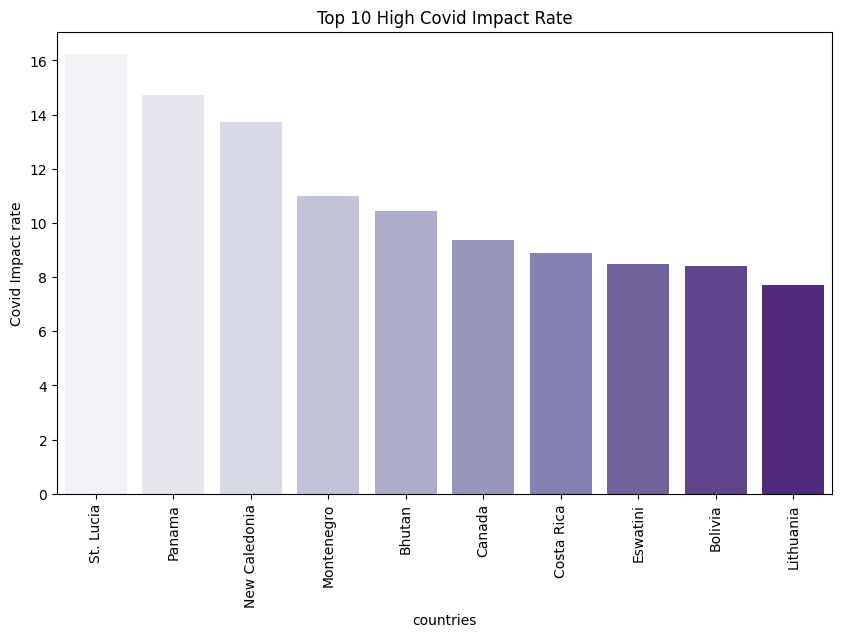

In [30]:
countries = top_10_high_covid_impact_rate['Country Name']
covid_dif = top_10_high_covid_impact_rate['covid_year_dif']
paired_palette = sns.color_palette('Purples',10)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('countries')
plt.ylabel('Covid Impact rate')
plt.title("Top 10 High Covid Impact Rate")
barplot = sns.barplot(x=countries, y=covid_dif, palette=paired_palette, legend=False, hue=countries)
plt.show()


- list top 10 countries that have an less covid impact of unemployment

In [31]:
top_low_covid_impact_rate = non_null_df.sort_values(by='covid_year_dif', ascending=True)
top_10_low_covid_impact_rate = top_low_covid_impact_rate.head(10)
top_10_low_covid_impact_rate

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,2022,2023,10years_avg,covid_year_dif
163,Mongolia,MNG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,8.674,8.841,8.832,8.681,8.478,8.573,...,20.178,17.472,16.451,21.738,15.899,17.431,11.536,11.398,15.6845,-5.839
263,South Africa,ZAF,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,34.841,35.717,35.993,35.984,35.815,35.731,...,43.933,42.811,43.760,47.411,43.500,49.866,49.826,49.144,45.6195,-3.911
258,Vanuatu,VUT,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,13.649,13.613,14.036,13.844,13.907,13.854,...,10.674,10.880,11.079,11.399,8.888,10.050,10.848,10.711,10.5252,-2.511
112,"Iran, Islamic Rep.",IRN,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,22.669,21.860,21.589,21.178,20.040,18.517,...,29.066,28.208,27.545,25.972,23.705,23.733,22.956,22.791,25.4978,-2.267
67,"Egypt, Arab Rep.",EGY,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,27.036,25.305,30.829,30.989,30.858,25.470,...,33.687,32.704,26.322,20.707,18.535,18.308,19.022,18.989,25.4666,-2.172
237,Timor-Leste,TLS,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,9.502,9.580,9.648,9.802,9.947,10.078,...,13.074,11.353,9.631,7.840,6.612,4.756,3.180,3.173,8.4122,-1.228
59,Dominican Republic,DOM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,12.293,12.143,11.736,11.742,12.051,12.202,...,16.776,13.471,14.888,15.886,14.806,16.915,12.893,11.752,14.7205,-1.080
89,Greece,GRC,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,23.888,27.048,30.544,29.131,30.556,31.875,...,47.145,43.322,39.952,34.723,33.710,35.294,31.140,26.567,39.4182,-1.013
10,Armenia,ARM,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,1.755,1.964,5.734,7.254,7.237,9.987,...,23.878,25.435,27.001,24.616,23.760,22.362,19.011,18.961,22.8348,-0.856
214,Serbia,SRB,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,29.561,29.676,29.841,29.783,29.627,29.377,...,34.941,31.869,29.658,27.464,26.616,25.481,24.254,24.310,31.5433,-0.848



- Plot top 10 countries that have an less covid impact of unemployment

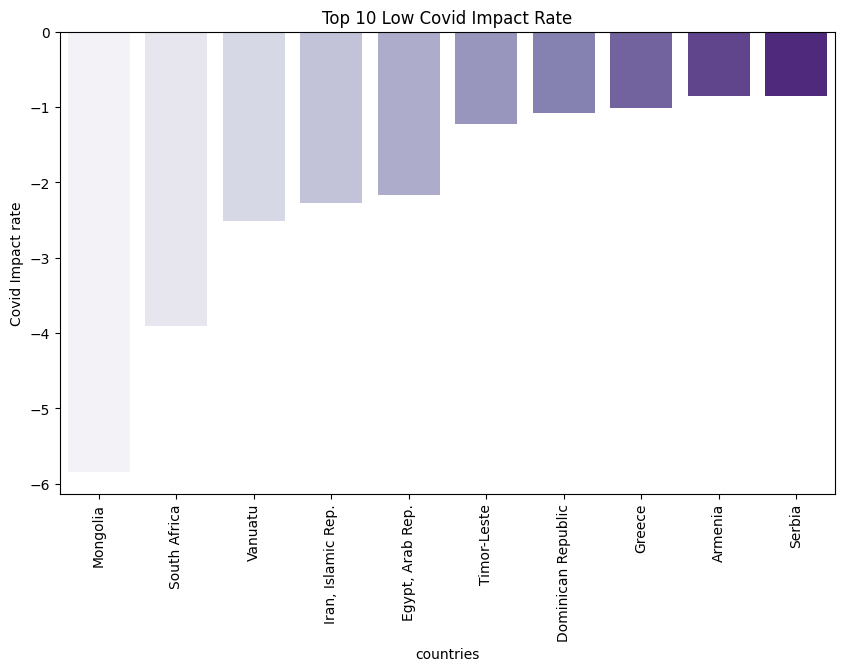

In [32]:
countries = top_10_low_covid_impact_rate['Country Name']
covid_dif = top_10_low_covid_impact_rate['covid_year_dif']
paired_palette = sns.color_palette('Purples',10)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('countries')
plt.ylabel('Covid Impact rate')
plt.title("Top 10 Low Covid Impact Rate")
barplot = sns.barplot(x=countries, y=covid_dif, palette=paired_palette, legend=False, hue=countries)
plt.show()

# Extra Score (Optional)

Analyse data Poverty headcount: https://data.worldbank.org/indicator/SI.POV.DDAY?locations=1W&start=1984&view=chart

What can you check and summary this data?

In [33]:
path = sys.path[0]+'/poverty/'
# read all CSV files in folder using glob 
poverty_file = glob.glob(os.path.join(path, "*.csv"))

In [34]:
dataframe = pd.read_csv(poverty_file[-1], skiprows=4)
dataframe

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,0.8,0.8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,60.8,NaN,NaN,NaN,NaN,NaN,NaN,64.3,NaN,NaN


Drop null values

In [35]:
data = dataframe.drop(dataframe.columns[-2:], axis=1)
data = data.drop(data.columns[4:-11], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2012            98 non-null     float64
 5   2013            89 non-null     float64
 6   2014            96 non-null     float64
 7   2015            99 non-null     float64
 8   2016            95 non-null     float64
 9   2017            92 non-null     float64
 10  2018            104 non-null    float64
 11  2019            88 non-null     float64
 12  2020            74 non-null     float64
 13  2021            80 non-null     float64
 14  2022            37 non-null     float64
dtypes: float64(11), object(4)
memory usage: 31.3+ KB


There is a significant missing data, so we will only analyse the data from 2012-2022

In [36]:
data.describe()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,98.000000,89.000000,96.000000,99.000000,95.000000,92.000000,104.000000,88.000000,74.000000,80.000000,37.000000
mean,7.693878,5.705618,6.829167,7.024242,6.958947,4.480435,6.000962,5.054545,4.410811,5.376250,5.737838
std,14.095681,11.735730,12.213771,12.736090,14.042902,8.979357,10.713457,13.010181,12.435858,11.322949,11.887069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225000,0.200000,0.275000,0.250000,0.200000,0.200000,0.200000,0.175000,0.125000,0.200000,0.600000
50%,1.350000,1.000000,1.350000,1.300000,1.100000,0.750000,0.900000,0.750000,0.500000,0.650000,1.300000
75%,6.850000,4.600000,6.200000,5.800000,4.650000,4.300000,5.000000,2.400000,1.950000,3.825000,4.300000
max,80.700000,65.100000,64.600000,60.800000,67.300000,44.500000,50.900000,74.500000,78.900000,65.700000,64.300000


Plot the last 10 years of poverty headcount data using line graph

In [37]:
last_10_years = data.loc[:, '2012':'2022']
data.loc[:, '10years_avg'] = last_10_years.mean(axis=1)
data.dropna(axis=0, inplace=True,subset=['10years_avg'])

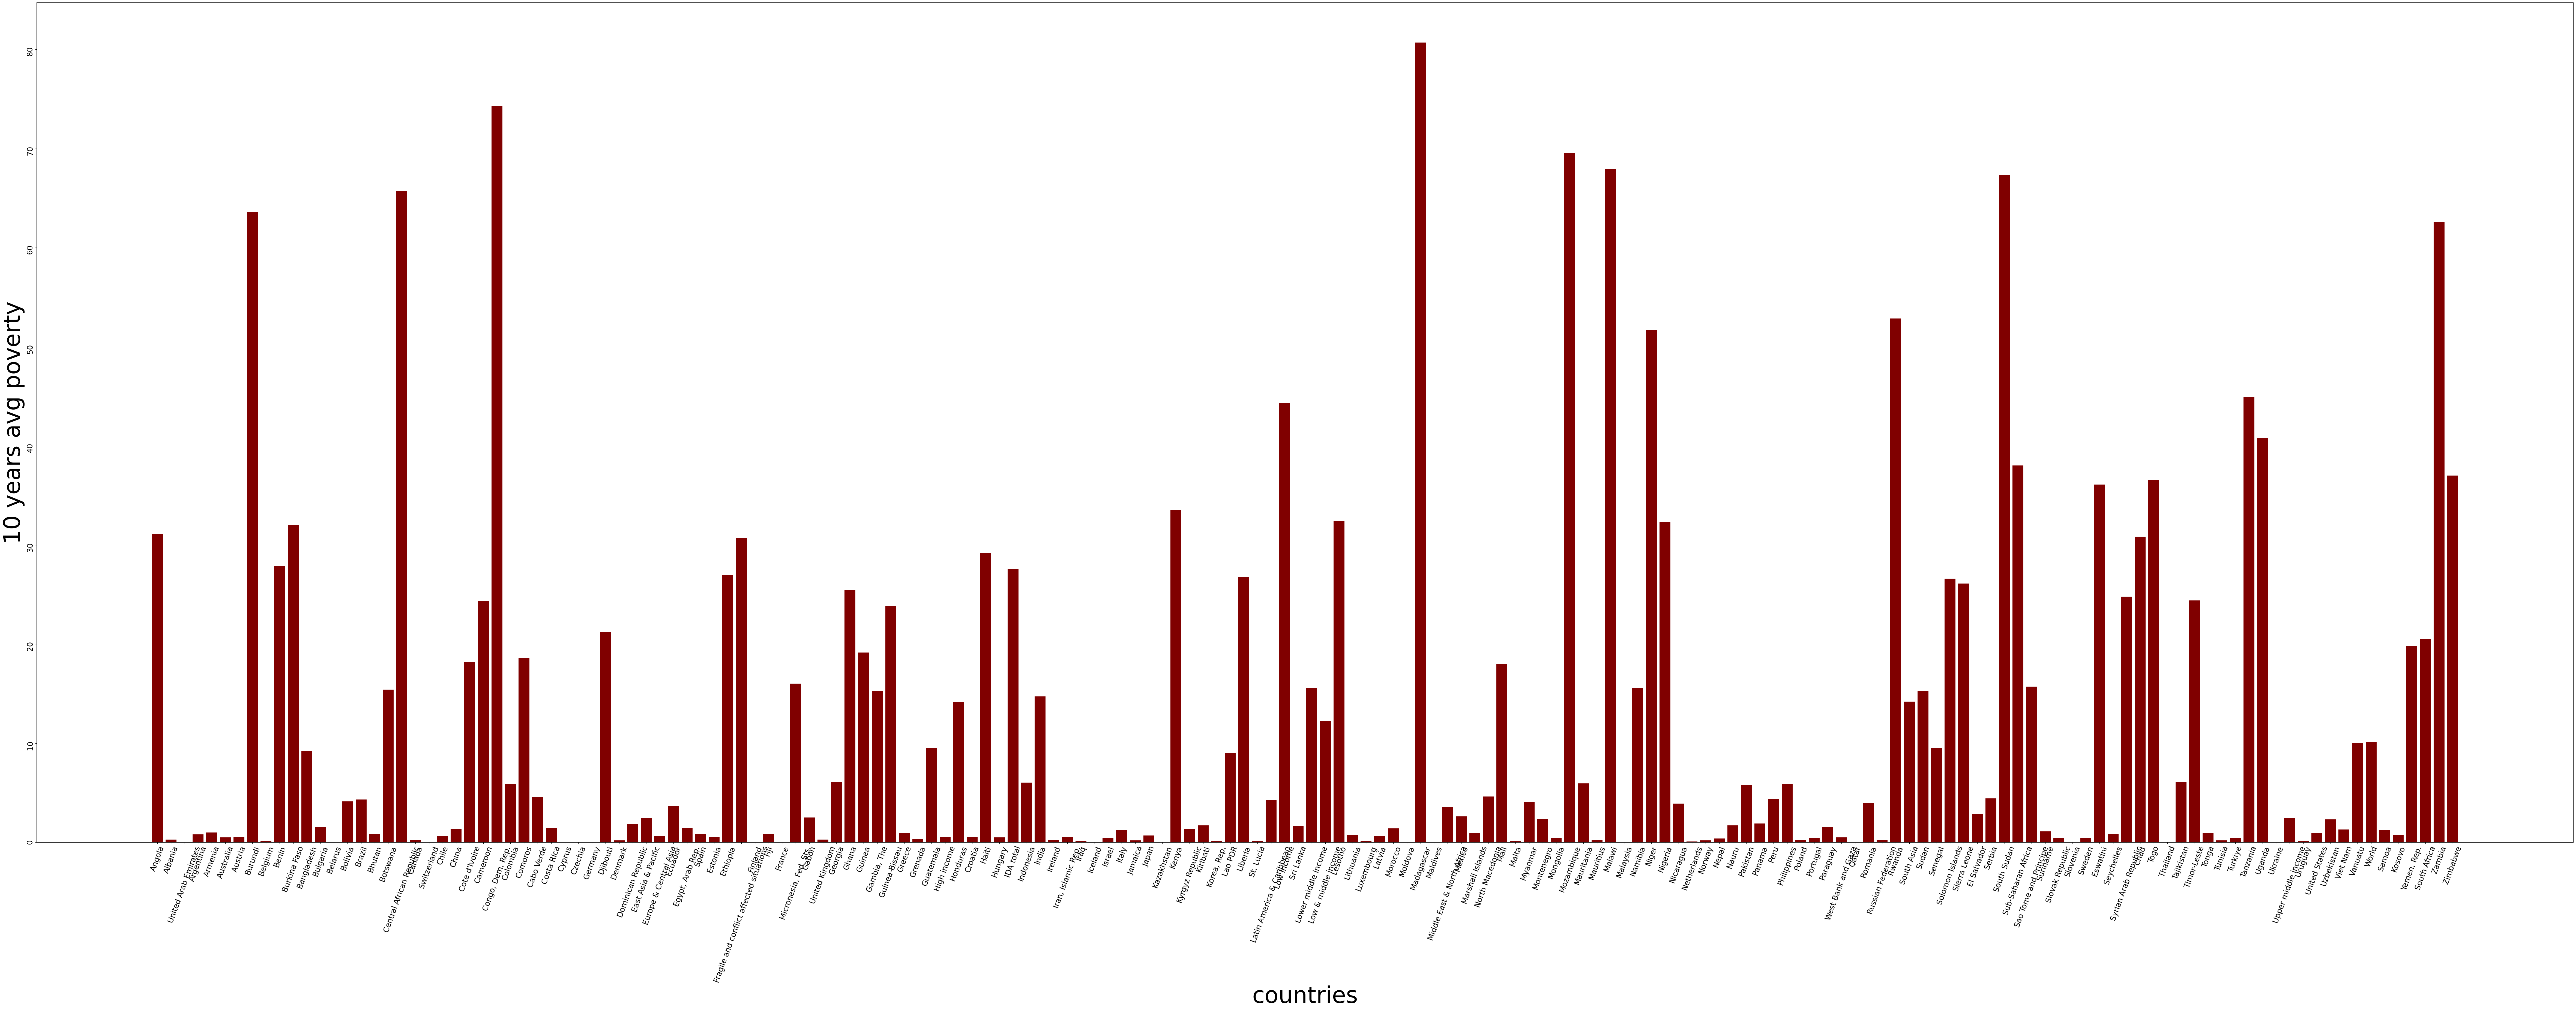

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(120,40))
countries = data['Country Name']
avg10y = data['10years_avg']
plt.bar(countries, avg10y, color ='maroon')

plt.xlabel('countries',fontsize = 60)
plt.ylabel('10 years avg poverty',fontsize = 60)

plt.xticks(rotation = 70, fontsize = 20)
plt.yticks(rotation = 'vertical', fontsize = 20)

plt.show()

- list all countries where poverty is greater than or equal to 25% in 2022


In [39]:
first_quantile_of_2022 = data['2022'].quantile(.25)
data[data['2022'] >= first_quantile_of_2022]

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,10years_avg
9,Argentina,ARG,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,0.6,0.7,0.6,NaN,0.7,0.6,1.0,1.1,1.2,0.9,0.6,0.800000
10,Armenia,ARM,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,0.8,1.7,1.4,1.1,1.1,0.8,1.3,1.0,0.4,0.5,0.8,0.990909
20,Bangladesh,BGD,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,13.5,NaN,NaN,NaN,NaN,NaN,5.0,9.250000
29,Brazil,BRA,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,4.5,3.7,3.3,3.9,4.7,5.3,5.3,5.4,2.0,5.8,3.5,4.309091
45,Colombia,COL,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,6.7,6.1,5.4,4.9,4.9,4.3,4.5,5.3,9.4,7.3,6.0,5.890909
48,Costa Rica,CRI,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,1.7,1.6,1.5,1.6,1.3,1.2,1.5,1.1,2.3,1.2,0.9,1.445455
59,Dominican Republic,DOM,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,3.8,3.0,3.4,2.5,2.0,1.0,0.8,0.8,1.0,0.9,0.8,1.818182
63,East Asia & Pacific,EAS,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,8.3,4.3,3.4,2.3,1.7,1.2,1.2,1.0,1.1,1.1,1.0,2.418182
66,Ecuador,ECU,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,4.5,3.2,2.6,3.4,3.6,3.2,3.3,3.6,6.5,3.6,3.2,3.700000
82,Georgia,GEO,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,10.7,8.1,6.1,4.9,4.9,6.2,5.6,4.8,5.8,5.5,4.3,6.081818


- list all countries where poverty is less than or equal to 1% in 2022

In [40]:
min_quantile_of_2022 = data['2022'].min()
data[data['2022'] <= min_quantile_of_2022 ]

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,10years_avg
32,Bhutan,BTN,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,1.7,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,0.0,0.866667


- list top 10 countries that have an average high rate of poverty from 2012-2022

In [41]:
top_high_poverty_rate = data.sort_values(by='10years_avg', ascending=False)
top_10_high_poverty_rate = top_high_poverty_rate.head(10)
top_10_high_poverty_rate

,Country Name,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,10years_avg
151,Madagascar,MDG,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,80.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.70
43,"Congo, Dem. Rep.",COD,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,69.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.9,NaN,NaN,74.30
165,Mozambique,MOZ,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,64.6,NaN,NaN,NaN,NaN,74.5,NaN,NaN,NaN,69.55
168,Malawi,MWI,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,65.7,NaN,NaN,70.1,NaN,NaN,NaN,67.90
216,South Sudan,SSD,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,67.3,NaN,NaN,NaN,NaN,NaN,NaN,67.30
34,Central African Republic,CAF,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.7,NaN,65.70
16,Burundi,BDI,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,65.1,NaN,NaN,NaN,NaN,NaN,NaN,62.1,NaN,NaN,63.60
264,Zambia,ZMB,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,60.8,NaN,NaN,NaN,NaN,NaN,NaN,64.3,62.55
203,Rwanda,RWA,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,53.7,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,52.85
173,Niger,NER,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,53.6,NaN,NaN,NaN,50.9,NaN,NaN,50.6,NaN,51.70


- plot top 10 countries that have a high average rate of poverty from 2012-2022 using bar graph

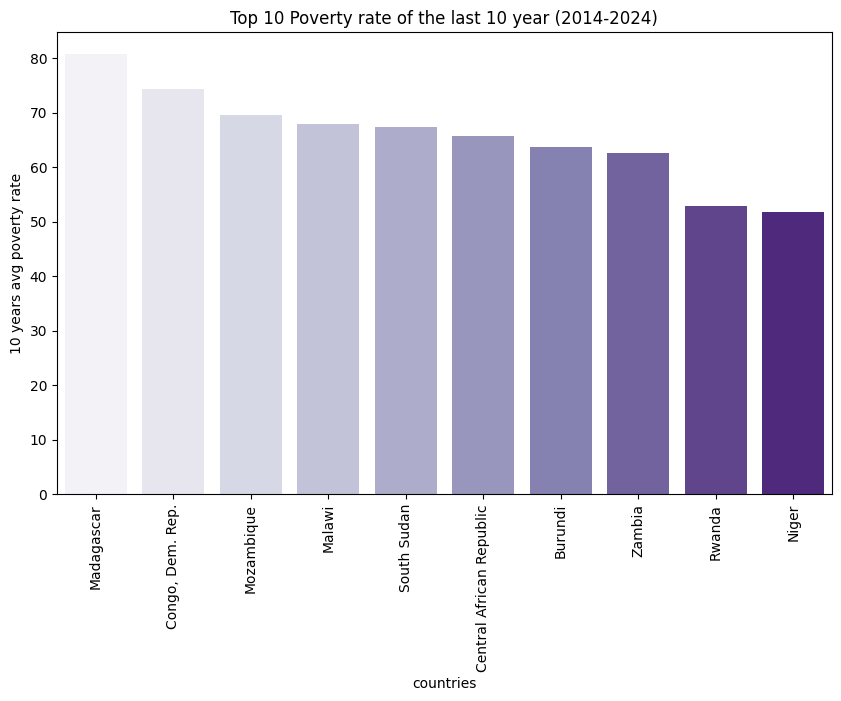

In [42]:
countries = top_10_high_poverty_rate['Country Name']
avg10y = top_10_high_poverty_rate['10years_avg']
paired_palette = sns.color_palette('Purples',10)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlabel('countries')
plt.ylabel('10 years avg poverty rate')
plt.title("Top 10 Poverty rate of the last 10 year (2014-2024)")
barplot = sns.barplot(x=countries, y=avg10y, palette=paired_palette, legend=False, hue=countries)
plt.show()